In [1]:
 # Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import (
    Xception, preprocess_input, decode_predictions)

In [2]:
 # Load the Xception model
# https://keras.io/applications/#xception
model = Xception(
    include_top=True,
    weights='imagenet')

In [3]:
# Default Image Size for Xception
image_size = (299, 299)

In [4]:
# Check directory
os.getcwd()

'C:\\Users\\Ryan\\OneDrive - ogg.com\\DU_class\\Projects\\rkustas.github.io\\keras'

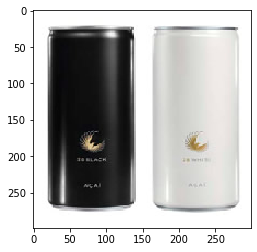

In [5]:
# Load the image and resize to the input dimensions that Xception
# was trained with
image_path = os.path.join("../../../Caffeine-Project/Caffeine/", "Pics", "img_1.jpg")
img = image.load_img(image_path, target_size=image_size)
plt.imshow(img)

In [6]:
 # Preprocess image for model prediction
# This step handles scaling and normalization for Xception
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Predicted: [('n03916031', 'perfume', 0.23986427), ('n03690938', 'lotion', 0.17441796), ('n03314780', 'face_powder', 0.112557776)]


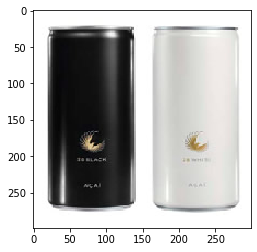

In [7]:
 # Make predictions
predictions = model.predict(x)
print('Predicted:', decode_predictions(predictions, top=3)[0])
plt.imshow(img)

In [8]:
 # Refactor above steps into reusable function
def predict(image_path):
    """Use Xception to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = model.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3)[0])

Predicted: [('n03937543', 'pill_bottle', 0.2552131), ('n03825788', 'nipple', 0.16431026), ('n04357314', 'sunscreen', 0.12821892)]


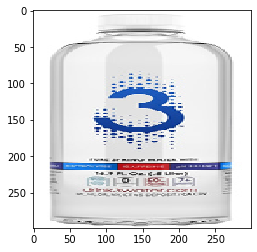

In [9]:
# Try with another image
image_path = os.path.join("../../../Caffeine-Project/Caffeine/", "Pics", "img_2.jpg")
predict(image_path)

In [10]:
# Try the VGG19 model
 # Dependencies
import matplotlib.pyplot as plt
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import (
    VGG19, 
    preprocess_input, 
    decode_predictions
)

In [11]:
 # Load the VGG19 model
# https://keras.io/applications/#VGG19
modelVGG = VGG19(include_top=True, weights='imagenet')

In [12]:
# Change default image size for VGG19
 # Define default image size for VGG19
image_size_VGG19 = (224, 224)

In [13]:
# Try with another image in a different model
image_pathVGG = os.path.join("../../../Caffeine-Project/Caffeine/", "Pics", "img_2.jpg")

In [14]:
 # Refactor above steps into reusable function
def predict(image_path):
    """Use Xception to label image"""
    img = image.load_img(image_pathVGG, target_size=image_size_VGG19)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    predictions = modelVGG.predict(x)
    plt.imshow(img)
    print('Predicted:', decode_predictions(predictions, top=3)[0])

Predicted: [('n03916031', 'perfume', 0.3707412), ('n03584254', 'iPod', 0.13467483), ('n04557648', 'water_bottle', 0.094387524)]


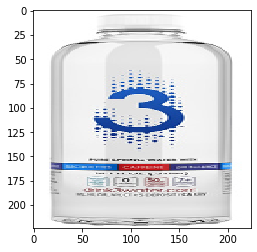

In [15]:
predict(image_pathVGG)

## None of the above pretrained models worked well

In [16]:
# Dependencies
import pandas as pd
import matplotlib as mp
import numpy as np

In [17]:
# Load datasets
path1 = os.path.join("../../../Caffeine-Project/Caffeine/", "CSVs", "All_drink_info.csv")
path2 = os.path.join("../../../Caffeine-Project/Caffeine/", "CSVs", "Caffeine_intensity.csv")
drink_df = pd.read_csv(path1)
caff_intdf = pd.read_csv(path2)

In [18]:
drink_df.head()

,drinks,caff_cont,fluid_oz,mg_per_oz,url
0,10 Hour Energy Shot,422,1.93,218.7,https://www.caffeineinformer.com/caffeine-cont...
1,28 Black Energy Drink,80,8.46,9.5,https://www.caffeineinformer.com/caffeine-cont...
2,3 Water,50,16.90,3.0,https://www.caffeineinformer.com/caffeine-cont...
3,3D Energy Drink,200,16.00,12.5,https://www.caffeineinformer.com/caffeine-cont...
4,4 Purpose Energy Drink,70,8.46,8.3,https://www.caffeineinformer.com/caffeine-cont...


In [19]:
caff_intdf.head()

,caff_str,item_img,drink_name
0,DANGEROUS,https://caffeineinformer.com/wp-content/caffei...,10 Hour Energy Shot
1,MODERATE,https://caffeineinformer.com/wp-content/caffei...,28 Black Energy Drink
2,MODERATE,https://caffeineinformer.com/wp-content/caffei...,3 Water
3,VERY HIGH,https://caffeineinformer.com/wp-content/caffei...,3D Energy Drink
4,MODERATE,https://caffeineinformer.com/wp-content/caffei...,4-Purpose


In [68]:
# Join DF
drinkscaffdf = drink_df.join(caff_intdf)
drinkscaffdf

,drinks,caff_cont,fluid_oz,mg_per_oz,url,caff_str,item_img,drink_name
0,10 Hour Energy Shot,422,1.93,218.7,https://www.caffeineinformer.com/caffeine-cont...,DANGEROUS,https://caffeineinformer.com/wp-content/caffei...,10 Hour Energy Shot
1,28 Black Energy Drink,80,8.46,9.5,https://www.caffeineinformer.com/caffeine-cont...,MODERATE,https://caffeineinformer.com/wp-content/caffei...,28 Black Energy Drink
2,3 Water,50,16.90,3.0,https://www.caffeineinformer.com/caffeine-cont...,MODERATE,https://caffeineinformer.com/wp-content/caffei...,3 Water
3,3D Energy Drink,200,16.00,12.5,https://www.caffeineinformer.com/caffeine-cont...,VERY HIGH,https://caffeineinformer.com/wp-content/caffei...,3D Energy Drink
4,4 Purpose Energy Drink,70,8.46,8.3,https://www.caffeineinformer.com/caffeine-cont...,MODERATE,https://caffeineinformer.com/wp-content/caffei...,4-Purpose
...,...,...,...,...,...,...,...,...
769,ZipFizz Energy Drink,100,16.00,6.2,https://www.caffeineinformer.com/caffeine-cont...,HIGH,https://caffeineinformer.com/wp-content/caffei...,ZipFizz Energy Drink
770,Zola Coconut Water Espresso,125,17.50,7.1,https://www.caffeineinformer.com/caffeine-cont...,HIGH,https://caffeineinformer.com/wp-content/caffei...,Zola Coconut Water Espresso
771,Zola Organic Hydrating Energy Drink,120,12.00,10.0,https://www.caffeineinformer.com/caffeine-cont...,HIGH,https://caffeineinformer.com/wp-content/caffei...,Zola Organic Hydrating Energy Drink
772,Zola Sparkling Energy Water,100,12.00,8.3,https://www.caffeineinformer.com/caffeine-cont...,HIGH,https://caffeineinformer.com/wp-content/caffei...,Zola Sparkling Energy Water


In [69]:
# Drop unneeded columns
drinkscaffdf = drinkscaffdf.drop(columns=['drinks','item_img','url','drink_name'])
drinkscaffdf

,caff_cont,fluid_oz,mg_per_oz,caff_str
0,422,1.93,218.7,DANGEROUS
1,80,8.46,9.5,MODERATE
2,50,16.90,3.0,MODERATE
3,200,16.00,12.5,VERY HIGH
4,70,8.46,8.3,MODERATE
...,...,...,...,...
769,100,16.00,6.2,HIGH
770,125,17.50,7.1,HIGH
771,120,12.00,10.0,HIGH
772,100,12.00,8.3,HIGH


In [201]:
# Dependencies for ML

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsClassifier


y = drinkscaffdf['caff_str']
X = drinkscaffdf.drop("caff_str",axis=1)
print(X.shape,y.shape)

(774, 3) (774,)


In [202]:
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,stratify=y)

In [203]:
# Normalize the data
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled.shape

(580, 3)

In [204]:
# Label encode y
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [205]:
# One-hot encode categorical data
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)
y_train_categorical.shape

(580, 7)

## First model

In [206]:
# Normal Neural network 3 inputs, 6 hidden, 7 outputs
model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=3))
model.add(Dense(units=7, activation='softmax'))

In [207]:
# View summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 6)                 24        
_________________________________________________________________
dense_21 (Dense)             (None, 7)                 49        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


In [208]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [209]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
19/19 - 0s - loss: 2.0788 - accuracy: 0.1190
Epoch 2/1000
19/19 - 0s - loss: 2.0407 - accuracy: 0.1448
Epoch 3/1000
19/19 - 0s - loss: 2.0071 - accuracy: 0.1569
Epoch 4/1000
19/19 - 0s - loss: 1.9762 - accuracy: 0.2017
Epoch 5/1000
19/19 - 0s - loss: 1.9481 - accuracy: 0.2086
Epoch 6/1000
19/19 - 0s - loss: 1.9228 - accuracy: 0.2190
Epoch 7/1000
19/19 - 0s - loss: 1.8996 - accuracy: 0.2224
Epoch 8/1000
19/19 - 0s - loss: 1.8776 - accuracy: 0.2672
Epoch 9/1000
19/19 - 0s - loss: 1.8572 - accuracy: 0.3086
Epoch 10/1000
19/19 - 0s - loss: 1.8373 - accuracy: 0.3069
Epoch 11/1000
19/19 - 0s - loss: 1.8182 - accuracy: 0.3069
Epoch 12/1000
19/19 - 0s - loss: 1.7998 - accuracy: 0.3379
Epoch 13/1000
19/19 - 0s - loss: 1.7812 - accuracy: 0.3862
Epoch 14/1000
19/19 - 0s - loss: 1.7634 - accuracy: 0.3672
Epoch 15/1000
19/19 - 0s - loss: 1.7459 - accuracy: 0.3276
Epoch 16/1000
19/19 - 0s - loss: 1.7281 - accuracy: 0.3000
Epoch 17/1000
19/19 - 0s - loss: 1.7107 - accuracy: 0.2914
Epoch 

Epoch 140/1000
19/19 - 0s - loss: 0.6465 - accuracy: 0.8397
Epoch 141/1000
19/19 - 0s - loss: 0.6428 - accuracy: 0.8397
Epoch 142/1000
19/19 - 0s - loss: 0.6388 - accuracy: 0.8483
Epoch 143/1000
19/19 - 0s - loss: 0.6357 - accuracy: 0.8345
Epoch 144/1000
19/19 - 0s - loss: 0.6318 - accuracy: 0.8431
Epoch 145/1000
19/19 - 0s - loss: 0.6287 - accuracy: 0.8483
Epoch 146/1000
19/19 - 0s - loss: 0.6247 - accuracy: 0.8448
Epoch 147/1000
19/19 - 0s - loss: 0.6220 - accuracy: 0.8345
Epoch 148/1000
19/19 - 0s - loss: 0.6184 - accuracy: 0.8397
Epoch 149/1000
19/19 - 0s - loss: 0.6151 - accuracy: 0.8448
Epoch 150/1000
19/19 - 0s - loss: 0.6121 - accuracy: 0.8448
Epoch 151/1000
19/19 - 0s - loss: 0.6085 - accuracy: 0.8517
Epoch 152/1000
19/19 - 0s - loss: 0.6049 - accuracy: 0.8517
Epoch 153/1000
19/19 - 0s - loss: 0.6017 - accuracy: 0.8466
Epoch 154/1000
19/19 - 0s - loss: 0.5987 - accuracy: 0.8483
Epoch 155/1000
19/19 - 0s - loss: 0.5956 - accuracy: 0.8500
Epoch 156/1000
19/19 - 0s - loss: 0.5926

Epoch 277/1000
19/19 - 0s - loss: 0.3625 - accuracy: 0.9000
Epoch 278/1000
19/19 - 0s - loss: 0.3614 - accuracy: 0.9069
Epoch 279/1000
19/19 - 0s - loss: 0.3603 - accuracy: 0.9069
Epoch 280/1000
19/19 - 0s - loss: 0.3598 - accuracy: 0.9138
Epoch 281/1000
19/19 - 0s - loss: 0.3585 - accuracy: 0.9086
Epoch 282/1000
19/19 - 0s - loss: 0.3573 - accuracy: 0.9069
Epoch 283/1000
19/19 - 0s - loss: 0.3561 - accuracy: 0.9017
Epoch 284/1000
19/19 - 0s - loss: 0.3552 - accuracy: 0.8845
Epoch 285/1000
19/19 - 0s - loss: 0.3544 - accuracy: 0.8914
Epoch 286/1000
19/19 - 0s - loss: 0.3531 - accuracy: 0.9000
Epoch 287/1000
19/19 - 0s - loss: 0.3524 - accuracy: 0.9069
Epoch 288/1000
19/19 - 0s - loss: 0.3512 - accuracy: 0.9138
Epoch 289/1000
19/19 - 0s - loss: 0.3502 - accuracy: 0.9224
Epoch 290/1000
19/19 - 0s - loss: 0.3503 - accuracy: 0.9034
Epoch 291/1000
19/19 - 0s - loss: 0.3478 - accuracy: 0.9069
Epoch 292/1000
19/19 - 0s - loss: 0.3469 - accuracy: 0.9224
Epoch 293/1000
19/19 - 0s - loss: 0.3462

Epoch 414/1000
19/19 - 0s - loss: 0.2636 - accuracy: 0.9259
Epoch 415/1000
19/19 - 0s - loss: 0.2635 - accuracy: 0.9224
Epoch 416/1000
19/19 - 0s - loss: 0.2628 - accuracy: 0.9259
Epoch 417/1000
19/19 - 0s - loss: 0.2622 - accuracy: 0.9276
Epoch 418/1000
19/19 - 0s - loss: 0.2618 - accuracy: 0.9328
Epoch 419/1000
19/19 - 0s - loss: 0.2618 - accuracy: 0.9293
Epoch 420/1000
19/19 - 0s - loss: 0.2610 - accuracy: 0.9293
Epoch 421/1000
19/19 - 0s - loss: 0.2601 - accuracy: 0.9328
Epoch 422/1000
19/19 - 0s - loss: 0.2604 - accuracy: 0.9293
Epoch 423/1000
19/19 - 0s - loss: 0.2596 - accuracy: 0.9345
Epoch 424/1000
19/19 - 0s - loss: 0.2590 - accuracy: 0.9345
Epoch 425/1000
19/19 - 0s - loss: 0.2589 - accuracy: 0.9345
Epoch 426/1000
19/19 - 0s - loss: 0.2581 - accuracy: 0.9362
Epoch 427/1000
19/19 - 0s - loss: 0.2583 - accuracy: 0.9362
Epoch 428/1000
19/19 - 0s - loss: 0.2570 - accuracy: 0.9345
Epoch 429/1000
19/19 - 0s - loss: 0.2568 - accuracy: 0.9345
Epoch 430/1000
19/19 - 0s - loss: 0.2564

Epoch 551/1000
19/19 - 0s - loss: 0.2146 - accuracy: 0.9621
Epoch 552/1000
19/19 - 0s - loss: 0.2149 - accuracy: 0.9414
Epoch 553/1000
19/19 - 0s - loss: 0.2143 - accuracy: 0.9328
Epoch 554/1000
19/19 - 0s - loss: 0.2134 - accuracy: 0.9621
Epoch 555/1000
19/19 - 0s - loss: 0.2132 - accuracy: 0.9638
Epoch 556/1000
19/19 - 0s - loss: 0.2133 - accuracy: 0.9586
Epoch 557/1000
19/19 - 0s - loss: 0.2126 - accuracy: 0.9414
Epoch 558/1000
19/19 - 0s - loss: 0.2127 - accuracy: 0.9310
Epoch 559/1000
19/19 - 0s - loss: 0.2121 - accuracy: 0.9379
Epoch 560/1000
19/19 - 0s - loss: 0.2117 - accuracy: 0.9655
Epoch 561/1000
19/19 - 0s - loss: 0.2120 - accuracy: 0.9621
Epoch 562/1000
19/19 - 0s - loss: 0.2113 - accuracy: 0.9621
Epoch 563/1000
19/19 - 0s - loss: 0.2122 - accuracy: 0.9379
Epoch 564/1000
19/19 - 0s - loss: 0.2104 - accuracy: 0.9483
Epoch 565/1000
19/19 - 0s - loss: 0.2116 - accuracy: 0.9397
Epoch 566/1000
19/19 - 0s - loss: 0.2106 - accuracy: 0.9534
Epoch 567/1000
19/19 - 0s - loss: 0.2105

Epoch 688/1000
19/19 - 0s - loss: 0.1845 - accuracy: 0.9638
Epoch 689/1000
19/19 - 0s - loss: 0.1840 - accuracy: 0.9638
Epoch 690/1000
19/19 - 0s - loss: 0.1840 - accuracy: 0.9621
Epoch 691/1000
19/19 - 0s - loss: 0.1841 - accuracy: 0.9638
Epoch 692/1000
19/19 - 0s - loss: 0.1838 - accuracy: 0.9603
Epoch 693/1000
19/19 - 0s - loss: 0.1840 - accuracy: 0.9603
Epoch 694/1000
19/19 - 0s - loss: 0.1835 - accuracy: 0.9586
Epoch 695/1000
19/19 - 0s - loss: 0.1832 - accuracy: 0.9672
Epoch 696/1000
19/19 - 0s - loss: 0.1832 - accuracy: 0.9672
Epoch 697/1000
19/19 - 0s - loss: 0.1830 - accuracy: 0.9655
Epoch 698/1000
19/19 - 0s - loss: 0.1825 - accuracy: 0.9672
Epoch 699/1000
19/19 - 0s - loss: 0.1826 - accuracy: 0.9655
Epoch 700/1000
19/19 - 0s - loss: 0.1826 - accuracy: 0.9672
Epoch 701/1000
19/19 - 0s - loss: 0.1827 - accuracy: 0.9655
Epoch 702/1000
19/19 - 0s - loss: 0.1819 - accuracy: 0.9655
Epoch 703/1000
19/19 - 0s - loss: 0.1817 - accuracy: 0.9655
Epoch 704/1000
19/19 - 0s - loss: 0.1816

Epoch 825/1000
19/19 - 0s - loss: 0.1640 - accuracy: 0.9655
Epoch 826/1000
19/19 - 0s - loss: 0.1640 - accuracy: 0.9655
Epoch 827/1000
19/19 - 0s - loss: 0.1634 - accuracy: 0.9672
Epoch 828/1000
19/19 - 0s - loss: 0.1637 - accuracy: 0.9655
Epoch 829/1000
19/19 - 0s - loss: 0.1633 - accuracy: 0.9672
Epoch 830/1000
19/19 - 0s - loss: 0.1629 - accuracy: 0.9672
Epoch 831/1000
19/19 - 0s - loss: 0.1629 - accuracy: 0.9672
Epoch 832/1000
19/19 - 0s - loss: 0.1630 - accuracy: 0.9638
Epoch 833/1000
19/19 - 0s - loss: 0.1627 - accuracy: 0.9690
Epoch 834/1000
19/19 - 0s - loss: 0.1632 - accuracy: 0.9672
Epoch 835/1000
19/19 - 0s - loss: 0.1624 - accuracy: 0.9655
Epoch 836/1000
19/19 - 0s - loss: 0.1622 - accuracy: 0.9690
Epoch 837/1000
19/19 - 0s - loss: 0.1620 - accuracy: 0.9672
Epoch 838/1000
19/19 - 0s - loss: 0.1617 - accuracy: 0.9672
Epoch 839/1000
19/19 - 0s - loss: 0.1619 - accuracy: 0.9638
Epoch 840/1000
19/19 - 0s - loss: 0.1622 - accuracy: 0.9672
Epoch 841/1000
19/19 - 0s - loss: 0.1618

Epoch 962/1000
19/19 - 0s - loss: 0.1477 - accuracy: 0.9638
Epoch 963/1000
19/19 - 0s - loss: 0.1476 - accuracy: 0.9655
Epoch 964/1000
19/19 - 0s - loss: 0.1475 - accuracy: 0.9655
Epoch 965/1000
19/19 - 0s - loss: 0.1473 - accuracy: 0.9655
Epoch 966/1000
19/19 - 0s - loss: 0.1472 - accuracy: 0.9638
Epoch 967/1000
19/19 - 0s - loss: 0.1474 - accuracy: 0.9638
Epoch 968/1000
19/19 - 0s - loss: 0.1471 - accuracy: 0.9672
Epoch 969/1000
19/19 - 0s - loss: 0.1473 - accuracy: 0.9707
Epoch 970/1000
19/19 - 0s - loss: 0.1467 - accuracy: 0.9690
Epoch 971/1000
19/19 - 0s - loss: 0.1471 - accuracy: 0.9690
Epoch 972/1000
19/19 - 0s - loss: 0.1464 - accuracy: 0.9672
Epoch 973/1000
19/19 - 0s - loss: 0.1467 - accuracy: 0.9655
Epoch 974/1000
19/19 - 0s - loss: 0.1461 - accuracy: 0.9638
Epoch 975/1000
19/19 - 0s - loss: 0.1465 - accuracy: 0.9638
Epoch 976/1000
19/19 - 0s - loss: 0.1465 - accuracy: 0.9655
Epoch 977/1000
19/19 - 0s - loss: 0.1462 - accuracy: 0.9672
Epoch 978/1000
19/19 - 0s - loss: 0.1466

In [210]:
# Add another hidden layer for deep learning
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=3))
deep_model.add(Dense(units=6, activation='relu', input_dim=3))
deep_model.add(Dense(units=7, activation='softmax'))

In [211]:
# Compile and fit deep model

deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
19/19 - 0s - loss: 1.9182 - accuracy: 0.3931
Epoch 2/1000
19/19 - 0s - loss: 1.8812 - accuracy: 0.4207
Epoch 3/1000
19/19 - 0s - loss: 1.8483 - accuracy: 0.4259
Epoch 4/1000
19/19 - 0s - loss: 1.8185 - accuracy: 0.4138
Epoch 5/1000
19/19 - 0s - loss: 1.7916 - accuracy: 0.4086
Epoch 6/1000
19/19 - 0s - loss: 1.7662 - accuracy: 0.3534
Epoch 7/1000
19/19 - 0s - loss: 1.7408 - accuracy: 0.3431
Epoch 8/1000
19/19 - 0s - loss: 1.7175 - accuracy: 0.3362
Epoch 9/1000
19/19 - 0s - loss: 1.6949 - accuracy: 0.3448
Epoch 10/1000
19/19 - 0s - loss: 1.6728 - accuracy: 0.3310
Epoch 11/1000
19/19 - 0s - loss: 1.6524 - accuracy: 0.3362
Epoch 12/1000
19/19 - 0s - loss: 1.6303 - accuracy: 0.3569
Epoch 13/1000
19/19 - 0s - loss: 1.6080 - accuracy: 0.3672
Epoch 14/1000
19/19 - 0s - loss: 1.5858 - accuracy: 0.3724
Epoch 15/1000
19/19 - 0s - loss: 1.5633 - accuracy: 0.3793
Epoch 16/1000
19/19 - 0s - loss: 1.5403 - accuracy: 0.3828
Epoch 17/1000
19/19 - 0s - loss: 1.5171 - accuracy: 0.3862
Epoch 

Epoch 140/1000
19/19 - 0s - loss: 0.2826 - accuracy: 0.9483
Epoch 141/1000
19/19 - 0s - loss: 0.2813 - accuracy: 0.9466
Epoch 142/1000
19/19 - 0s - loss: 0.2804 - accuracy: 0.9466
Epoch 143/1000
19/19 - 0s - loss: 0.2774 - accuracy: 0.9448
Epoch 144/1000
19/19 - 0s - loss: 0.2739 - accuracy: 0.9500
Epoch 145/1000
19/19 - 0s - loss: 0.2731 - accuracy: 0.9431
Epoch 146/1000
19/19 - 0s - loss: 0.2707 - accuracy: 0.9517
Epoch 147/1000
19/19 - 0s - loss: 0.2687 - accuracy: 0.9483
Epoch 148/1000
19/19 - 0s - loss: 0.2665 - accuracy: 0.9517
Epoch 149/1000
19/19 - 0s - loss: 0.2653 - accuracy: 0.9448
Epoch 150/1000
19/19 - 0s - loss: 0.2628 - accuracy: 0.9500
Epoch 151/1000
19/19 - 0s - loss: 0.2615 - accuracy: 0.9534
Epoch 152/1000
19/19 - 0s - loss: 0.2599 - accuracy: 0.9552
Epoch 153/1000
19/19 - 0s - loss: 0.2585 - accuracy: 0.9448
Epoch 154/1000
19/19 - 0s - loss: 0.2554 - accuracy: 0.9500
Epoch 155/1000
19/19 - 0s - loss: 0.2541 - accuracy: 0.9517
Epoch 156/1000
19/19 - 0s - loss: 0.2522

Epoch 277/1000
19/19 - 0s - loss: 0.1479 - accuracy: 0.9655
Epoch 278/1000
19/19 - 0s - loss: 0.1464 - accuracy: 0.9638
Epoch 279/1000
19/19 - 0s - loss: 0.1455 - accuracy: 0.9603
Epoch 280/1000
19/19 - 0s - loss: 0.1449 - accuracy: 0.9586
Epoch 281/1000
19/19 - 0s - loss: 0.1444 - accuracy: 0.9621
Epoch 282/1000
19/19 - 0s - loss: 0.1444 - accuracy: 0.9603
Epoch 283/1000
19/19 - 0s - loss: 0.1439 - accuracy: 0.9569
Epoch 284/1000
19/19 - 0s - loss: 0.1428 - accuracy: 0.9621
Epoch 285/1000
19/19 - 0s - loss: 0.1436 - accuracy: 0.9466
Epoch 286/1000
19/19 - 0s - loss: 0.1429 - accuracy: 0.9603
Epoch 287/1000
19/19 - 0s - loss: 0.1418 - accuracy: 0.9603
Epoch 288/1000
19/19 - 0s - loss: 0.1411 - accuracy: 0.9603
Epoch 289/1000
19/19 - 0s - loss: 0.1417 - accuracy: 0.9569
Epoch 290/1000
19/19 - 0s - loss: 0.1406 - accuracy: 0.9586
Epoch 291/1000
19/19 - 0s - loss: 0.1418 - accuracy: 0.9690
Epoch 292/1000
19/19 - 0s - loss: 0.1403 - accuracy: 0.9586
Epoch 293/1000
19/19 - 0s - loss: 0.1389

Epoch 414/1000
19/19 - 0s - loss: 0.1046 - accuracy: 0.9759
Epoch 415/1000
19/19 - 0s - loss: 0.1043 - accuracy: 0.9690
Epoch 416/1000
19/19 - 0s - loss: 0.1034 - accuracy: 0.9741
Epoch 417/1000
19/19 - 0s - loss: 0.1043 - accuracy: 0.9707
Epoch 418/1000
19/19 - 0s - loss: 0.1038 - accuracy: 0.9741
Epoch 419/1000
19/19 - 0s - loss: 0.1071 - accuracy: 0.9724
Epoch 420/1000
19/19 - 0s - loss: 0.1033 - accuracy: 0.9776
Epoch 421/1000
19/19 - 0s - loss: 0.1027 - accuracy: 0.9724
Epoch 422/1000
19/19 - 0s - loss: 0.1054 - accuracy: 0.9690
Epoch 423/1000
19/19 - 0s - loss: 0.1039 - accuracy: 0.9707
Epoch 424/1000
19/19 - 0s - loss: 0.1027 - accuracy: 0.9724
Epoch 425/1000
19/19 - 0s - loss: 0.1020 - accuracy: 0.9741
Epoch 426/1000
19/19 - 0s - loss: 0.1015 - accuracy: 0.9741
Epoch 427/1000
19/19 - 0s - loss: 0.1020 - accuracy: 0.9724
Epoch 428/1000
19/19 - 0s - loss: 0.1018 - accuracy: 0.9741
Epoch 429/1000
19/19 - 0s - loss: 0.1007 - accuracy: 0.9776
Epoch 430/1000
19/19 - 0s - loss: 0.1021

Epoch 551/1000
19/19 - 0s - loss: 0.0826 - accuracy: 0.9828
Epoch 552/1000
19/19 - 0s - loss: 0.0828 - accuracy: 0.9793
Epoch 553/1000
19/19 - 0s - loss: 0.0831 - accuracy: 0.9776
Epoch 554/1000
19/19 - 0s - loss: 0.0849 - accuracy: 0.9828
Epoch 555/1000
19/19 - 0s - loss: 0.0832 - accuracy: 0.9793
Epoch 556/1000
19/19 - 0s - loss: 0.0832 - accuracy: 0.9759
Epoch 557/1000
19/19 - 0s - loss: 0.0824 - accuracy: 0.9776
Epoch 558/1000
19/19 - 0s - loss: 0.0821 - accuracy: 0.9776
Epoch 559/1000
19/19 - 0s - loss: 0.0831 - accuracy: 0.9793
Epoch 560/1000
19/19 - 0s - loss: 0.0838 - accuracy: 0.9707
Epoch 561/1000
19/19 - 0s - loss: 0.0840 - accuracy: 0.9724
Epoch 562/1000
19/19 - 0s - loss: 0.0833 - accuracy: 0.9776
Epoch 563/1000
19/19 - 0s - loss: 0.0817 - accuracy: 0.9776
Epoch 564/1000
19/19 - 0s - loss: 0.0827 - accuracy: 0.9810
Epoch 565/1000
19/19 - 0s - loss: 0.0832 - accuracy: 0.9759
Epoch 566/1000
19/19 - 0s - loss: 0.0824 - accuracy: 0.9759
Epoch 567/1000
19/19 - 0s - loss: 0.0828

Epoch 688/1000
19/19 - 0s - loss: 0.0699 - accuracy: 0.9845
Epoch 689/1000
19/19 - 0s - loss: 0.0693 - accuracy: 0.9828
Epoch 690/1000
19/19 - 0s - loss: 0.0695 - accuracy: 0.9810
Epoch 691/1000
19/19 - 0s - loss: 0.0696 - accuracy: 0.9828
Epoch 692/1000
19/19 - 0s - loss: 0.0702 - accuracy: 0.9793
Epoch 693/1000
19/19 - 0s - loss: 0.0700 - accuracy: 0.9741
Epoch 694/1000
19/19 - 0s - loss: 0.0701 - accuracy: 0.9810
Epoch 695/1000
19/19 - 0s - loss: 0.0714 - accuracy: 0.9810
Epoch 696/1000
19/19 - 0s - loss: 0.0710 - accuracy: 0.9793
Epoch 697/1000
19/19 - 0s - loss: 0.0708 - accuracy: 0.9810
Epoch 698/1000
19/19 - 0s - loss: 0.0698 - accuracy: 0.9828
Epoch 699/1000
19/19 - 0s - loss: 0.0696 - accuracy: 0.9793
Epoch 700/1000
19/19 - 0s - loss: 0.0686 - accuracy: 0.9810
Epoch 701/1000
19/19 - 0s - loss: 0.0688 - accuracy: 0.9845
Epoch 702/1000
19/19 - 0s - loss: 0.0701 - accuracy: 0.9793
Epoch 703/1000
19/19 - 0s - loss: 0.0685 - accuracy: 0.9862
Epoch 704/1000
19/19 - 0s - loss: 0.0696

Epoch 825/1000
19/19 - 0s - loss: 0.0611 - accuracy: 0.9828
Epoch 826/1000
19/19 - 0s - loss: 0.0604 - accuracy: 0.9862
Epoch 827/1000
19/19 - 0s - loss: 0.0601 - accuracy: 0.9862
Epoch 828/1000
19/19 - 0s - loss: 0.0597 - accuracy: 0.9845
Epoch 829/1000
19/19 - 0s - loss: 0.0616 - accuracy: 0.9828
Epoch 830/1000
19/19 - 0s - loss: 0.0602 - accuracy: 0.9793
Epoch 831/1000
19/19 - 0s - loss: 0.0626 - accuracy: 0.9845
Epoch 832/1000
19/19 - 0s - loss: 0.0595 - accuracy: 0.9828
Epoch 833/1000
19/19 - 0s - loss: 0.0607 - accuracy: 0.9793
Epoch 834/1000
19/19 - 0s - loss: 0.0623 - accuracy: 0.9845
Epoch 835/1000
19/19 - 0s - loss: 0.0619 - accuracy: 0.9845
Epoch 836/1000
19/19 - 0s - loss: 0.0618 - accuracy: 0.9879
Epoch 837/1000
19/19 - 0s - loss: 0.0631 - accuracy: 0.9793
Epoch 838/1000
19/19 - 0s - loss: 0.0624 - accuracy: 0.9828
Epoch 839/1000
19/19 - 0s - loss: 0.0602 - accuracy: 0.9862
Epoch 840/1000
19/19 - 0s - loss: 0.0602 - accuracy: 0.9845
Epoch 841/1000
19/19 - 0s - loss: 0.0596

Epoch 962/1000
19/19 - 0s - loss: 0.0553 - accuracy: 0.9862
Epoch 963/1000
19/19 - 0s - loss: 0.0540 - accuracy: 0.9862
Epoch 964/1000
19/19 - 0s - loss: 0.0543 - accuracy: 0.9845
Epoch 965/1000
19/19 - 0s - loss: 0.0539 - accuracy: 0.9862
Epoch 966/1000
19/19 - 0s - loss: 0.0547 - accuracy: 0.9879
Epoch 967/1000
19/19 - 0s - loss: 0.0553 - accuracy: 0.9845
Epoch 968/1000
19/19 - 0s - loss: 0.0543 - accuracy: 0.9845
Epoch 969/1000
19/19 - 0s - loss: 0.0535 - accuracy: 0.9914
Epoch 970/1000
19/19 - 0s - loss: 0.0535 - accuracy: 0.9862
Epoch 971/1000
19/19 - 0s - loss: 0.0545 - accuracy: 0.9879
Epoch 972/1000
19/19 - 0s - loss: 0.0549 - accuracy: 0.9879
Epoch 973/1000
19/19 - 0s - loss: 0.0554 - accuracy: 0.9862
Epoch 974/1000
19/19 - 0s - loss: 0.0602 - accuracy: 0.9828
Epoch 975/1000
19/19 - 0s - loss: 0.0587 - accuracy: 0.9845
Epoch 976/1000
19/19 - 0s - loss: 0.0531 - accuracy: 0.9862
Epoch 977/1000
19/19 - 0s - loss: 0.0542 - accuracy: 0.9810
Epoch 978/1000
19/19 - 0s - loss: 0.0547

In [212]:
# Comparing,contrast models

model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

7/7 - 0s - loss: 0.1846 - accuracy: 0.9072
Normal Neural Network - Loss: 0.18457931280136108, Accuracy: 0.907216489315033


In [213]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

7/7 - 0s - loss: 0.1610 - accuracy: 0.9536
Deep Neural Network - Loss: 0.16102229058742523, Accuracy: 0.9536082744598389


In [214]:
# Making predictions
encoded_predictions = model.predict_classes(X_test_scaled[:5])
prediction_labels = label_encoder.inverse_transform(encoded_predictions)

In [215]:
# Predict
print(f"Predicted classes: {prediction_labels}")
print(f"Actual Labels: {list(y_test[:5])}")

Predicted classes: ['LOW' 'HIGH' 'HIGH' 'VERY HIGH' 'MODERATE']
Actual Labels: ['LOW', 'HIGH', 'VERY HIGH', 'EXTREME', 'MODERATE']


In [216]:
# Make predictions with new data
new_data = np.array([[0.2, 0.3, 0.4]])
print(f"Predicted class: {model.predict_classes(new_data)}")

Predicted class: [6]


In [217]:
# Save model
deep_model.save("Class prediction model.h5")

In [221]:
pwd

'C:\\Users\\Ryan\\OneDrive - ogg.com\\DU_class\\Projects\\rkustas.github.io\\keras'

In [224]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(deep_model, "caff_str_model")

## KNN

k: 1, Train/Test Score: 1.000/0.990
k: 3, Train/Test Score: 0.983/0.974
k: 5, Train/Test Score: 0.966/0.959
k: 7, Train/Test Score: 0.964/0.954
k: 9, Train/Test Score: 0.962/0.954
k: 11, Train/Test Score: 0.960/0.948
k: 13, Train/Test Score: 0.959/0.943
k: 15, Train/Test Score: 0.953/0.943
k: 17, Train/Test Score: 0.957/0.954
k: 19, Train/Test Score: 0.947/0.938


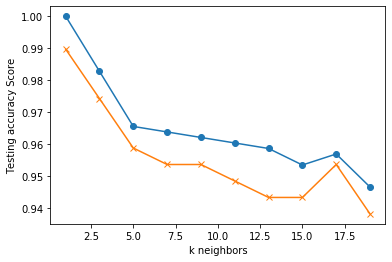

In [137]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [138]:
# k 17 was the best choice for this dataset

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train, y_train)
print('k=17 Test Acc: %.3f' % knn.score(X_test, y_test))

k=17 Test Acc: 0.954


## Linear and Logistic Regression

In [195]:
y = drinkscaffdf['caff_cont']
X = drinkscaffdf[['fluid_oz','mg_per_oz']]

print(X.shape,y.shape)

(774, 2) (774,)


In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [197]:
# Linear Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [198]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test) 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.2949920201901225
Testing Score: 0.17734660906425048


Text(0.5, 1.0, 'Residual Plot')

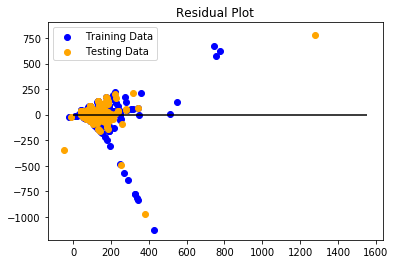

In [199]:
# Plot the residuals
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")